In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )


In [2]:
df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\credit_score_prediction\credit_score_classification\dataset\dataset_clean\clean_df.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.drop(columns =['ID', 'Customer_ID','Name',"SSN"], inplace = True)

In [5]:
df['Credit_Score'] = df['Credit_Score'].map({'Good':2, 'Poor':0,"Standard":1 })

In [6]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 19
['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']


In [7]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 5
['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [8]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))
print(discrete_feature)

Num of Discrete Features : 6
['Month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Credit_Score']


In [9]:
year_features=[feature for feature in df.columns if 'date' in feature or 'month' in feature]
print('Num of Year Features :',len(year_features))

Num of Year Features : 3


In [10]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature]
print('Num of Continuous Features :',len(continuous_feature))

Num of Continuous Features : 13


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [12]:
compute_vif(num_features, df)

,Variable,VIF
0,Month,1.055356
1,Age,1.088797
2,Annual_Income,316.602634
3,Monthly_Inhand_Salary,308.334778
4,Num_Bank_Accounts,1.993676
5,Num_Credit_Card,1.560909
6,Interest_Rate,2.501344
7,Num_of_Loan,2.690771
8,Delay_from_due_date,2.008614
9,Num_of_Delayed_Payment,1.919151


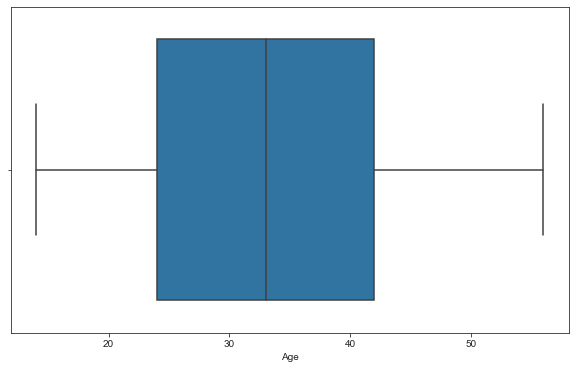

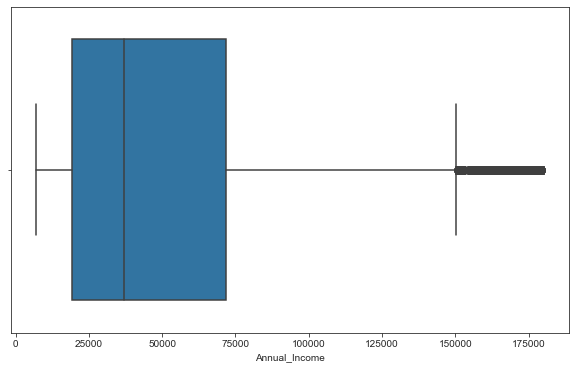

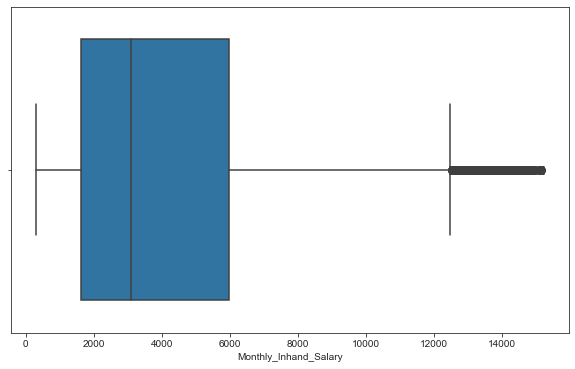

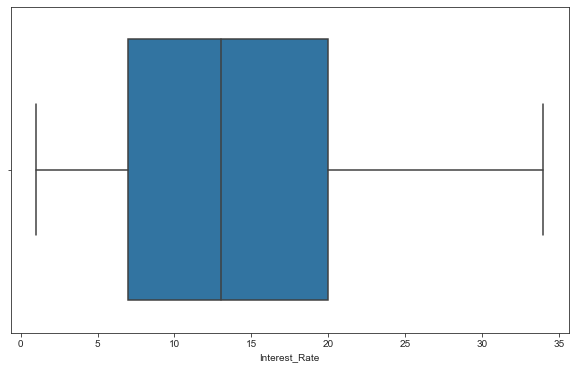

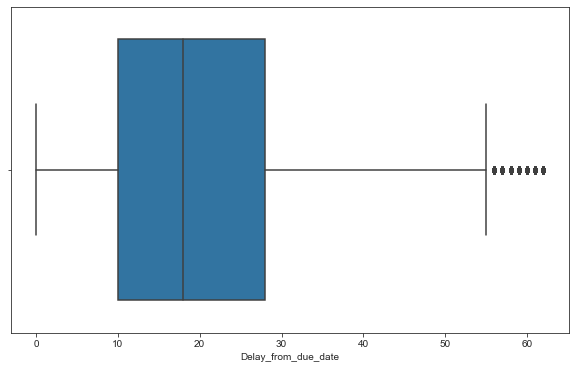

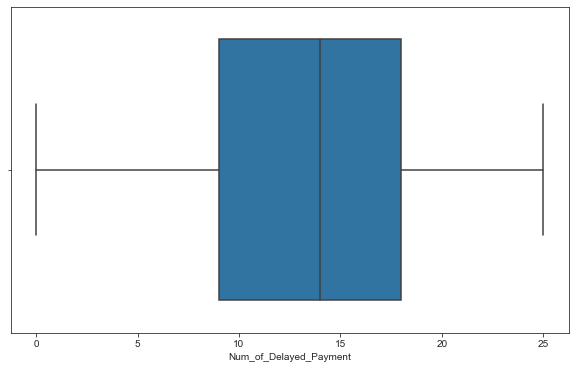

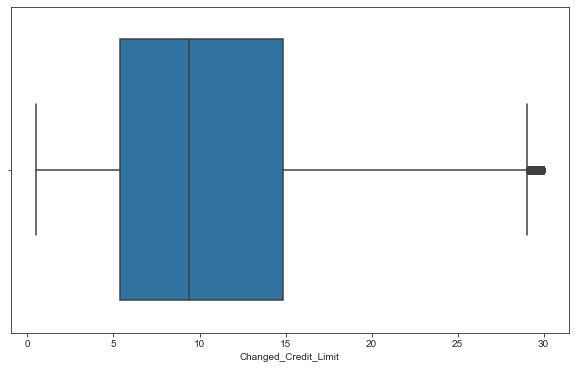

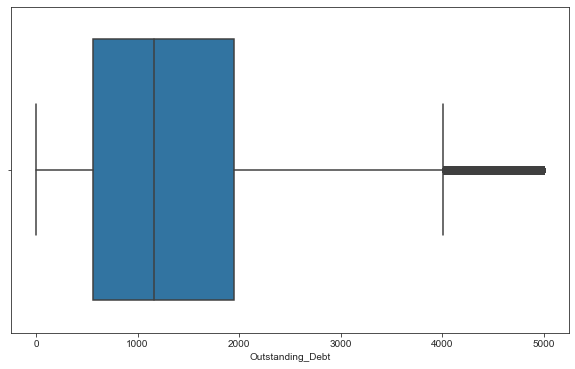

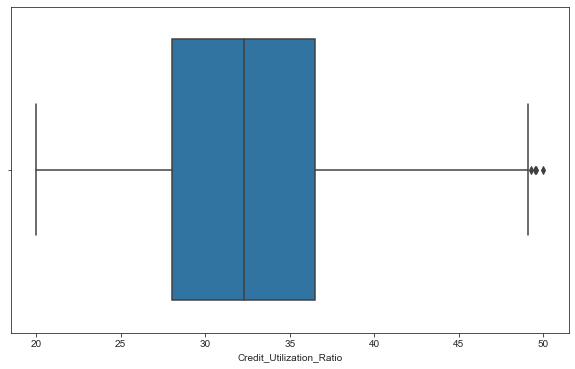

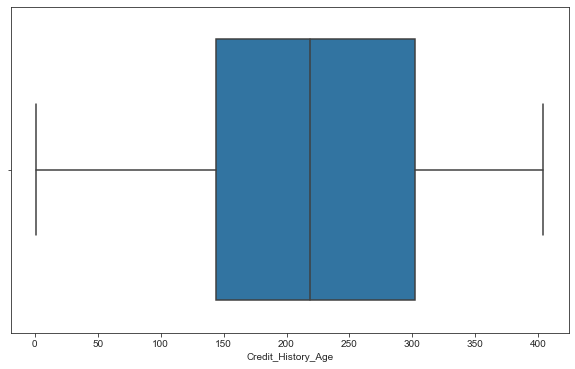

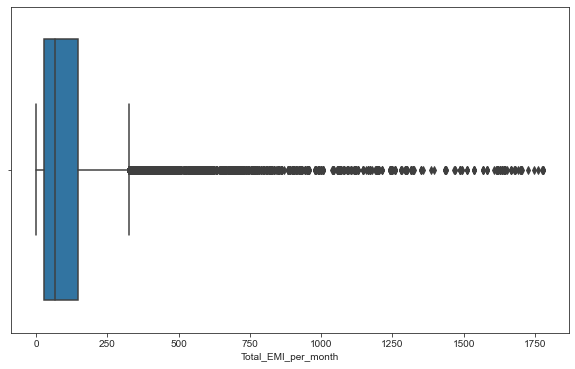

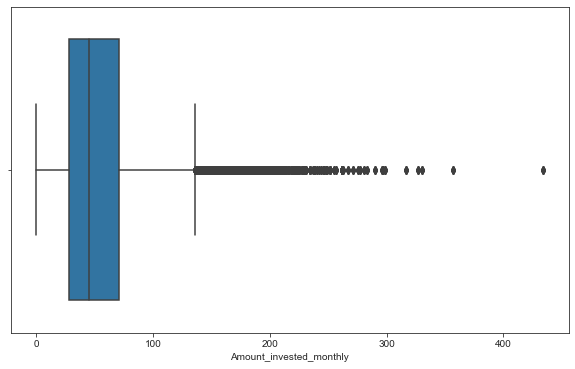

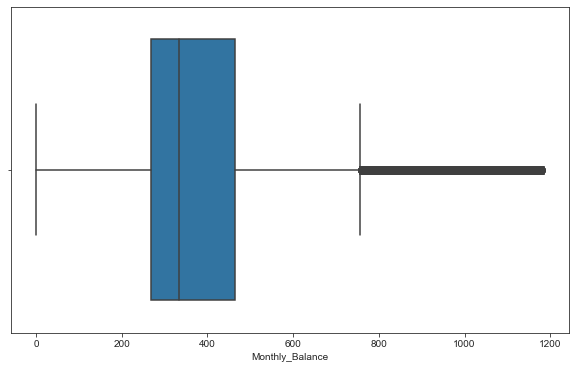

In [13]:
for i in continuous_feature:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [14]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [15]:
for col in continuous_feature:
         detect_outliers(col)


 #### Age ####
percentile25 24.0
percentile75 42.0
Upper limit 69.0
Lower limit -3.0

 #### Annual_Income ####
percentile25 19342.9725
percentile75 71683.47
Upper limit 150194.21625
Lower limit -59167.77374999999

 #### Monthly_Inhand_Salary ####
percentile25 1626.594166666667
percentile75 5957.715
Upper limit 12454.39625
Lower limit -4870.087083333333

 #### Interest_Rate ####
percentile25 7.0
percentile75 20.0
Upper limit 39.5
Lower limit -12.5

 #### Delay_from_due_date ####
percentile25 10.0
percentile75 28.0
Upper limit 55.0
Lower limit -17.0

 #### Num_of_Delayed_Payment ####
percentile25 9.0
percentile75 18.0
Upper limit 31.5
Lower limit -4.5

 #### Changed_Credit_Limit ####
percentile25 5.38
percentile75 14.85
Upper limit 29.055
Lower limit -8.825

 #### Outstanding_Debt ####
percentile25 566.0725
percentile75 1945.9625
Upper limit 4015.7975
Lower limit -1503.7625

 #### Credit_Utilization_Ratio ####
percentile25 28.05256656125577
percentile75 36.4966630559621
Upper limit 49.1

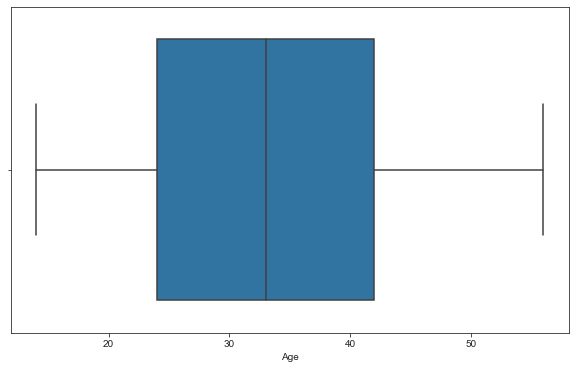

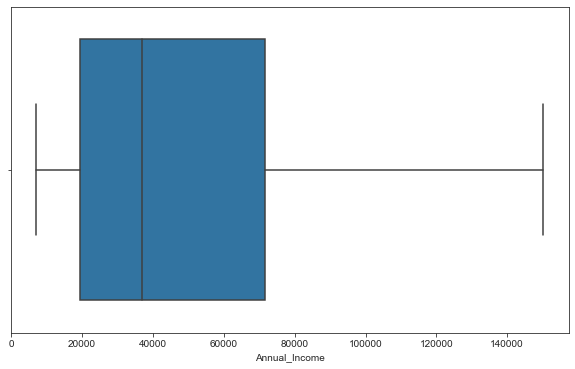

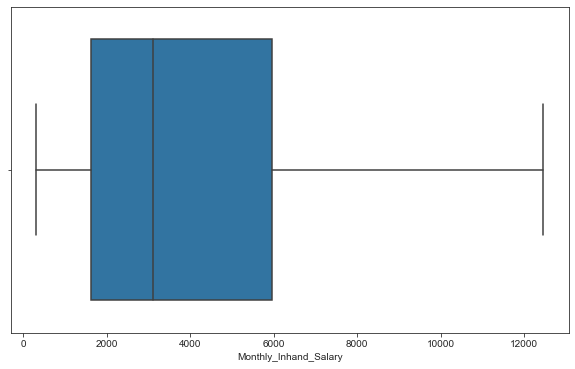

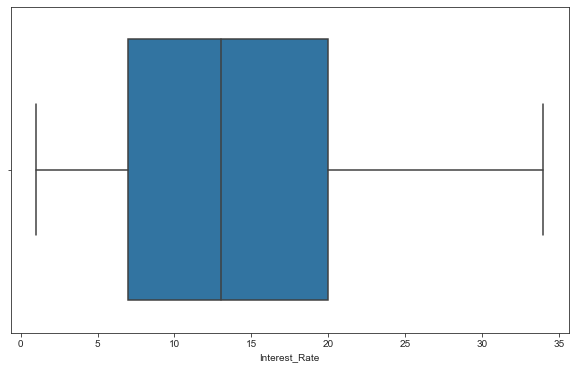

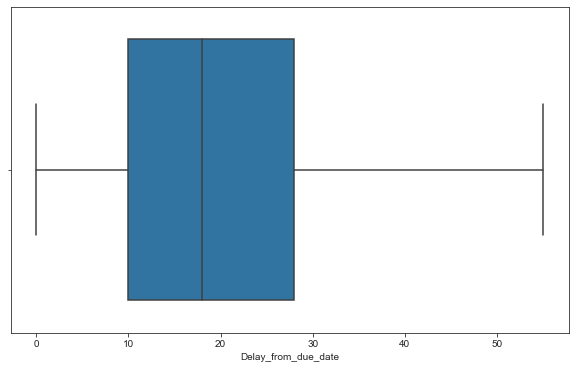

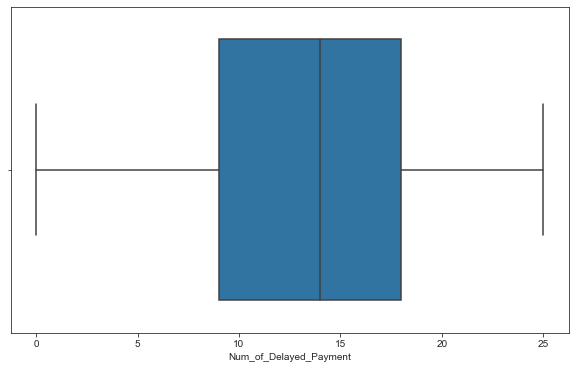

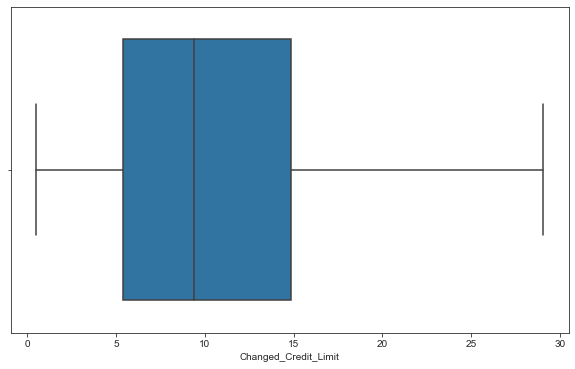

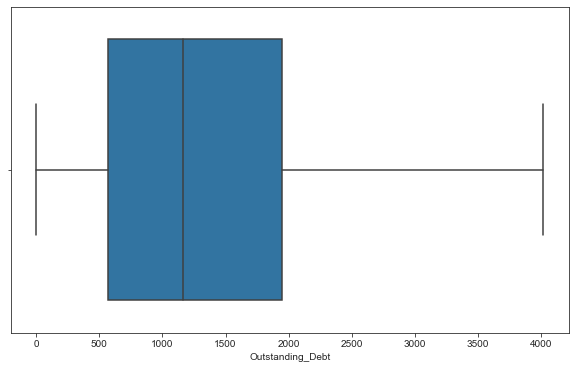

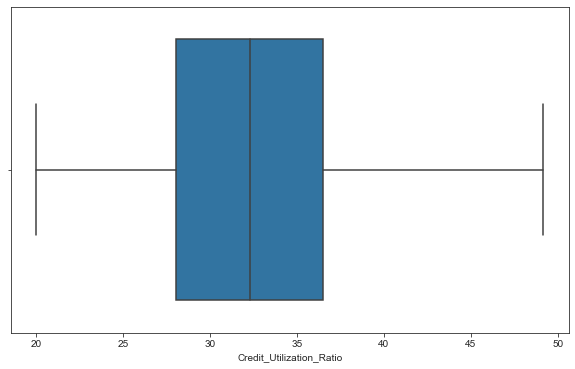

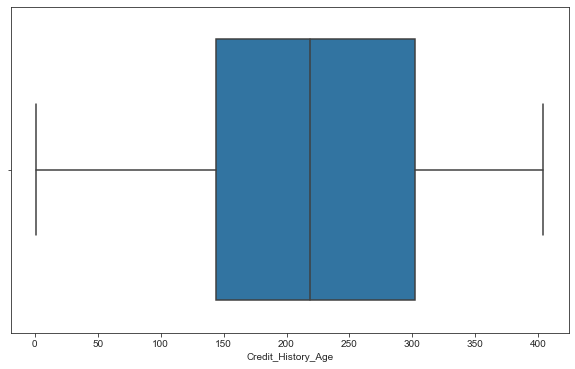

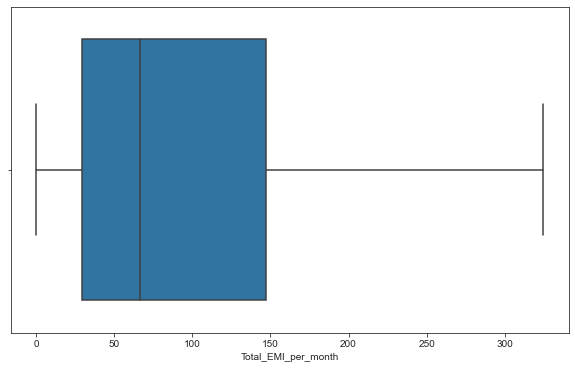

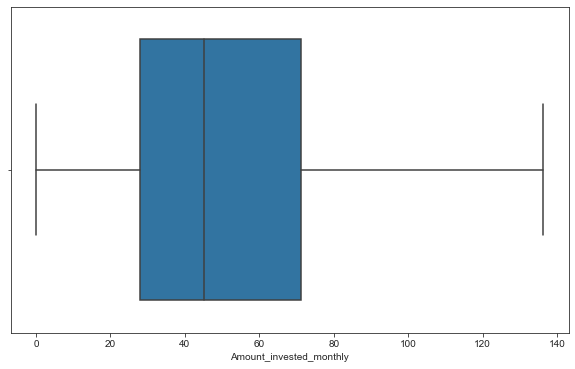

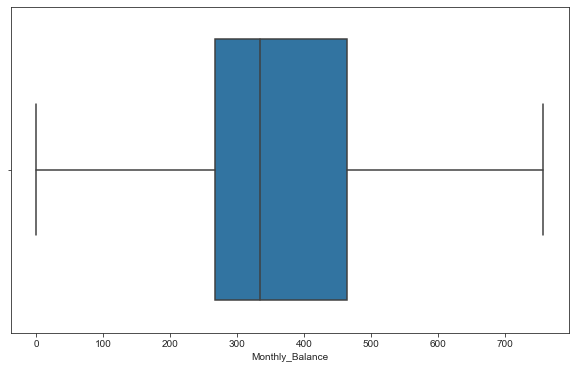

In [16]:
for i in continuous_feature:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(['Credit_Score'], axis=1)
y = df['Credit_Score']

In [18]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 5


In [19]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

Occupation : 15
Type_of_Loan : 6261
Credit_Mix : 3
Payment_of_Min_Amount : 3
Payment_Behaviour : 6


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
oh_columns = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount","Payment_Behaviour"]
bin_columns = ['Type_of_Loan']

numeric_transformer = StandardScaler()
bin_transformer = BinaryEncoder()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
         ('binary' ,bin_transformer, bin_columns),
         ("oh", oh_transformer, oh_columns),
          ("num", numeric_transformer, num_features)
    ]
)

In [21]:
# Apply Column Transformer
X = preprocessor.fit_transform(X)

In [22]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.53106095,
        -0.95111871, -0.40009484],
       [ 0.        ,  0.        ,  0.        , ..., -0.53106095,
        -0.95111871, -0.56196207],
       [ 0.        ,  0.        ,  0.        , ..., -0.53106095,
        -0.95111871, -0.291375  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.68785892,
        -0.87493061,  0.78677   ],
       [ 0.        ,  0.        ,  0.        , ..., -0.68785892,
        -0.87493061, -0.36134368],
       [ 0.        ,  0.        ,  0.        , ..., -0.68785892,
        -0.87493061,  0.07147711]])

In [23]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=36)
X_train.shape, X_test.shape

((75000, 58), (25000, 58))

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     #"Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred,average='weighted') # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred,average='weighted') # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8296
- F1 score: 0.8296
- Precision: 0.8302
- Recall: 0.8296


Naive Bayes
Model performance for Training set
- Accuracy: 0.6347
- F1 score: 0.6383
- Precision: 0.7002
- Recall: 0.6347
----------------------------------
Model performance for Test set
- Accuracy: 0.6326
- F1 score: 0.6358
- Precision: 0.6954
- Recall: 0.6326


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7237
- F1 score: 0.7245
- Precision: 0.7293
- Recall: 0.7237
----------------------------------
Model performance for Test set
- Accuracy: 0.7174
- F1 score: 0.7180
- Precision: 0.7224
- Recall: 0.7174


Logistic Regression
Model performance for Training set
- Accuracy: 0.6629
- F1 score: 0.6620
- Precision: 0.6663
- Recall: 0.6629
----------------------------------
Model performance for Test set
-